In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from matplotlib.animation import FuncAnimation, writers, PillowWriter
from copy import copy
from datetime import timedelta

In [3]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')

In [5]:
region = 'EqPac'
mortality = 0.39              # [d-1]
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 6                 # [hours]
death = 'NEMO_detritus'
grazing='full'
mixing = 'markov_0_KPP_reflect'+death+'_tidal'
diss = [0.006, 0.015, 0.05]
rho_p = 920
sizebinedges = [1e-3, 1e-4, 1e-5]
res = '1x1'
proc = 'bfnoadv'

In [7]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss[0])[2:]+'diss_1388rhobf_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss[1])[2:]+'diss_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss[2])[2:]+'diss_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [8]:
dslist = [ds_0, ds_1, ds_2]

In [9]:
split_ds_0 = list(ds_0.groupby_bins('r_pl', sizebinedges[::-1]))
split_ds_1 = list(ds_1.groupby_bins('r_pl', sizebinedges[::-1]))
split_ds_2 = list(ds_2.groupby_bins('r_pl', sizebinedges[::-1]))

In [10]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [15]:
number_of_trajectories_to_plot = 33
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 33 of 10000 trajectories
plotting every 303 particles


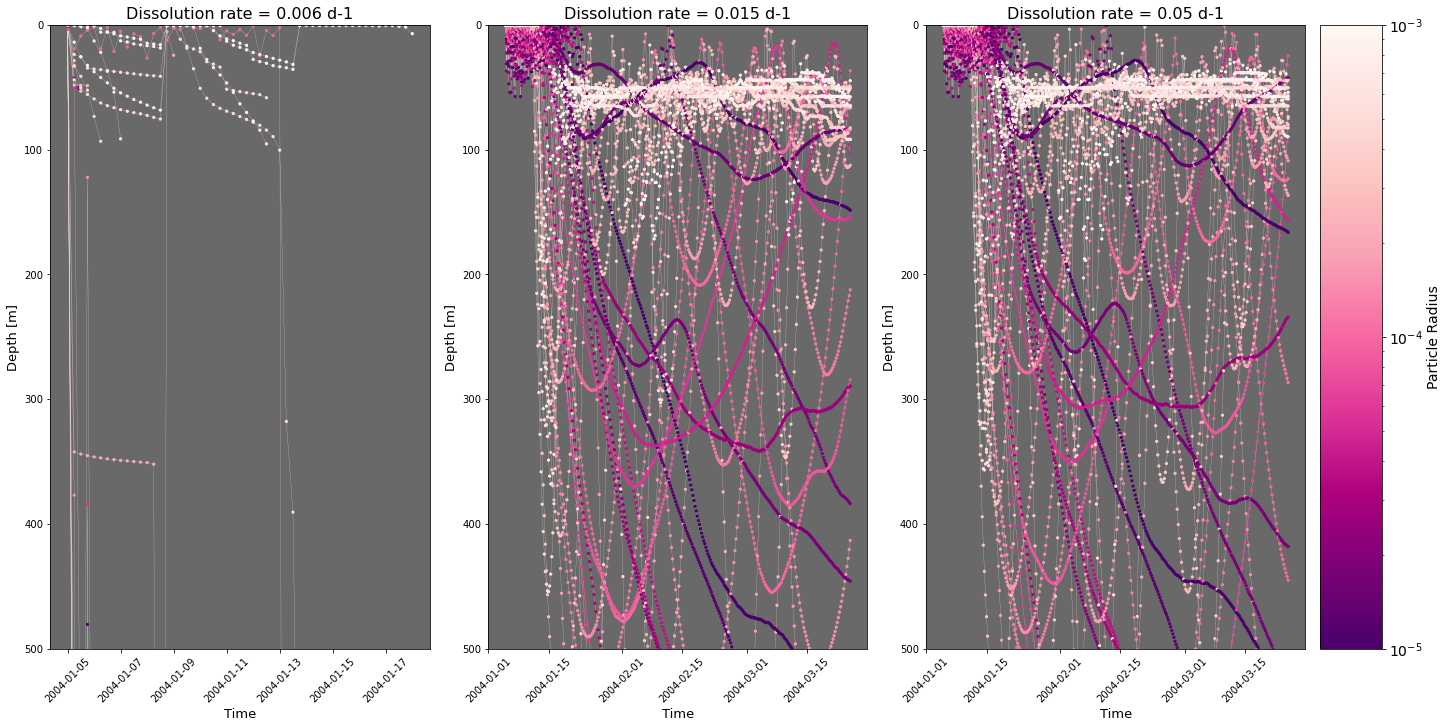

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10), constrained_layout=True)


sc = ax1.scatter(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = ax1.plot(ds_0['time'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax1.set_title('Dissolution rate = '+str(diss[0])+' d-1', fontsize=16)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_xlabel('Time', fontsize=13)
ax1.tick_params(axis='x', rotation=45)
ax1.set_facecolor('dimgray')
ax1.set_ylim(500,0)
# ax1.invert_yaxis()

sc = ax2.scatter(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = ax2.plot(ds_1['time'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax2.set_title('Dissolution rate = '+str(diss[1])+' d-1', fontsize=16)
ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
ax2.tick_params(axis='x', rotation=45)
ax2.set_facecolor('dimgray')
ax2.set_ylim(500,0)
# ax2.invert_yaxis()

sc = ax3.scatter(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = ax3.plot(ds_2['time'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
ax3.set_title('Dissolution rate = '+str(diss[2])+' d-1', fontsize=16)
ax3.set_ylabel('Depth [m]', fontsize=13)
ax3.set_xlabel('Time', fontsize=13)
ax3.tick_params(axis='x', rotation=45)
ax3.set_facecolor('dimgray')
ax3.set_ylim(500,0)
# ax3.invert_yaxis()

# sc = ax4.scatter(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_3['r_pl'].min(), vmax=ds_3['r_pl'].max()),zorder=2)
# ln = ax4.plot(ds_3['time'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
# ax4.set_title(death[3])
# ax4.set_ylabel('Depth [m]')
# ax4.set_xlabel('Time')
# ax4.set_facecolor('dimgray')
# # ax3.set_ylim(150,0)
# ax4.invert_yaxis()

cb = fig.colorbar(sc, ax=ax3)
cb.set_label('Particle Radius', fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()

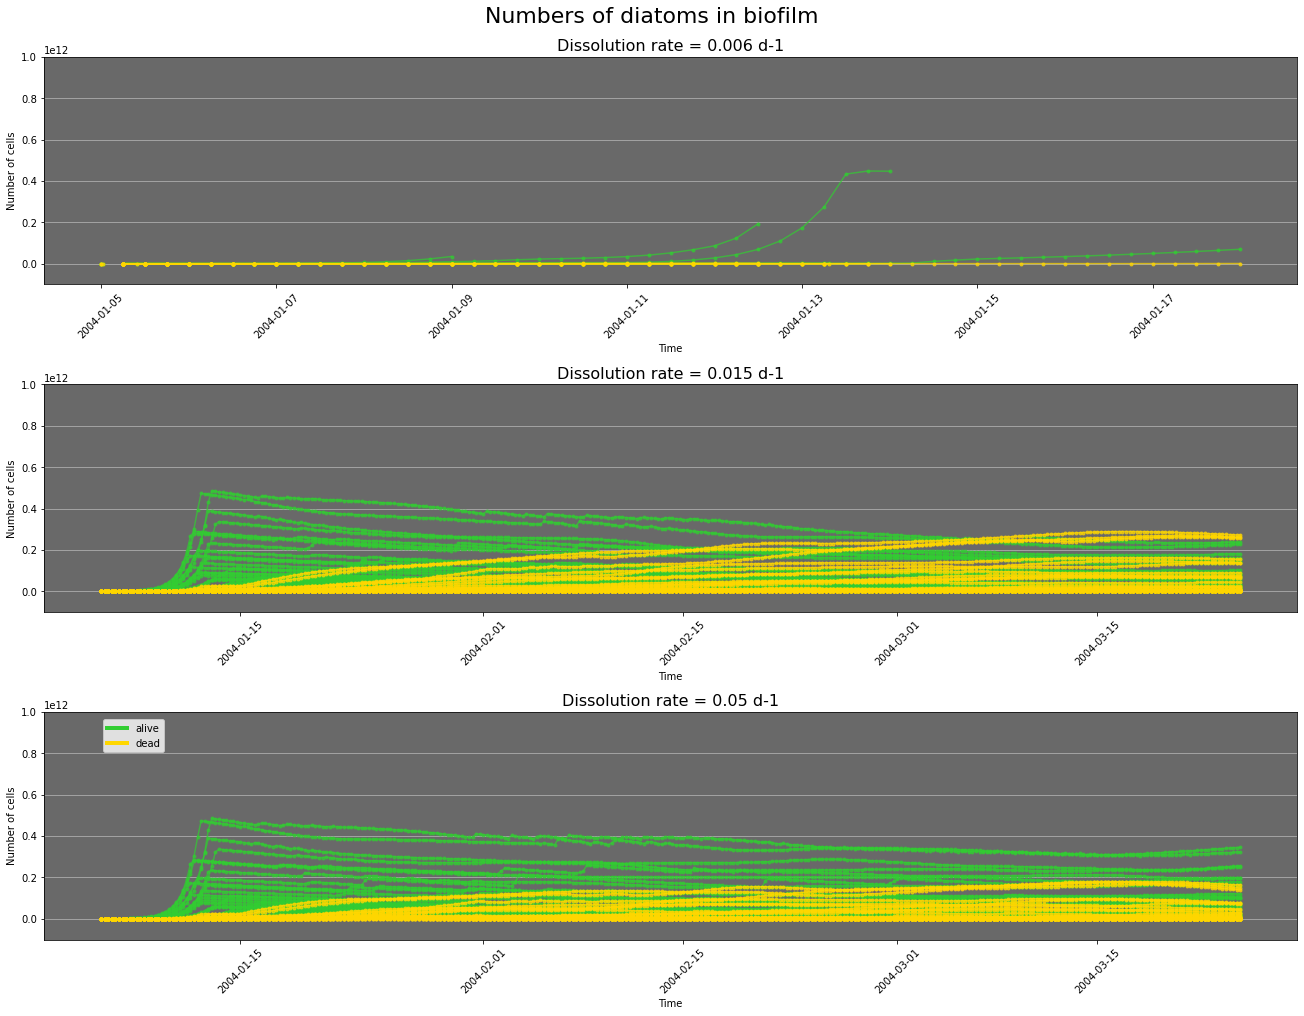

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(18,14), constrained_layout=True)
fig.suptitle('Numbers of diatoms in biofilm', fontsize=22)

ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Dissolution rate = '+str(diss[0])+' d-1', fontsize=16)
ax1.set_ylabel('Number of cells')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-1e11,1e12)

ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Dissolution rate = '+str(diss[1])+' d-1', fontsize=16)
ax2.set_ylabel('Number of cells')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-1e11,1e12)

ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a'].T[1:,::f_plt], marker='o', markersize=3,c='limegreen', alpha = 0.7, label='alive')
ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_dead'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.7, label='dead')
ax3.set_facecolor('dimgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Dissolution rate = '+str(diss[2])+' d-1', fontsize=16)
ax3.set_ylabel('Number of cells')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-1e11,1e12)

custom_lines = [Line2D([0], [0], color='limegreen', lw=4),
                Line2D([0], [0], color='gold', lw=4)]

ax3.legend(custom_lines, ["alive", "dead"], bbox_to_anchor=(0.1, 0.99), loc='upper right')
plt.show()

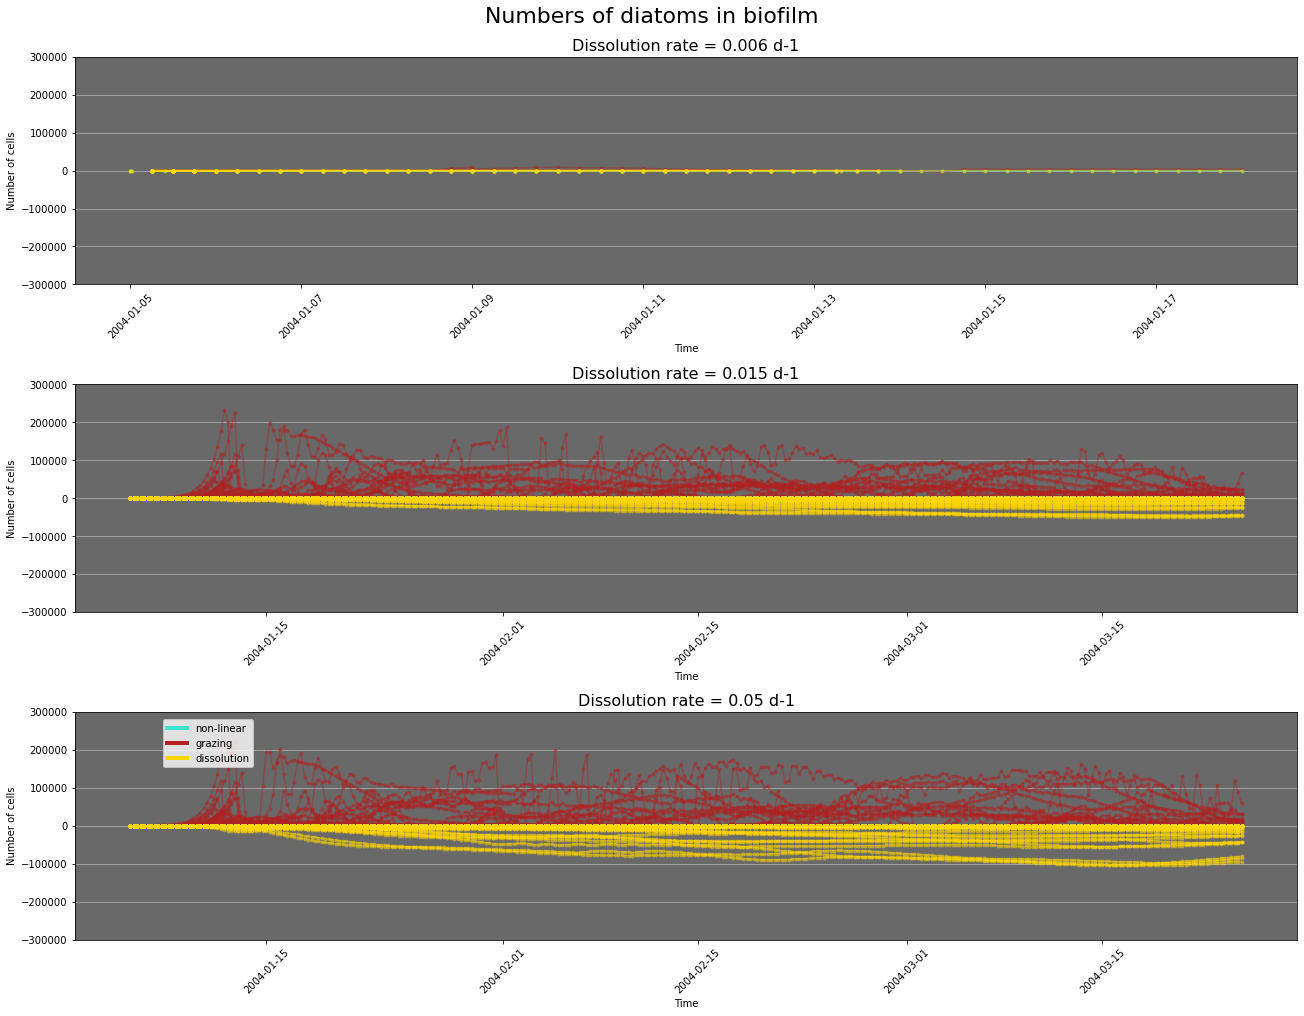

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(18,14), constrained_layout=True)
fig.suptitle('Numbers of diatoms in biofilm', fontsize=22)

ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
ax1.plot(ds_0['time'].T[1:,::f_plt], ds_0['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
ax1.plot(ds_0['time'].T[1:,::f_plt], -ds_0['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_title('Dissolution rate = '+str(diss[0])+' d-1', fontsize=16)
ax1.set_ylabel('Number of cells')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-3e5,3e5)

ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
ax2.plot(ds_1['time'].T[1:,::f_plt], ds_1['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
ax2.plot(ds_1['time'].T[1:,::f_plt], -ds_1['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_title('Dissolution rate = '+str(diss[1])+' d-1', fontsize=16)
ax2.set_ylabel('Number of cells')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-3e5,3e5)

ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_indirect'].T[1:,::f_plt], marker='o', markersize=3,c='firebrick', alpha = 0.4, label='grazing')
ax3.plot(ds_2['time'].T[1:,::f_plt], ds_2['a_direct'].T[1:,::f_plt], marker='o', markersize=3,c='turquoise', alpha = 0.4, label='non-linear')
ax3.plot(ds_2['time'].T[1:,::f_plt], -ds_2['a_diss'].T[1:,::f_plt], marker='o', markersize=3,c='gold', alpha = 0.4, label='dissolution')
ax3.set_facecolor('dimgray')
ax3.grid(b=True, axis='y')
ax3.set_title('Dissolution rate = '+str(diss[2])+' d-1', fontsize=16)
ax3.set_ylabel('Number of cells')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-3e5,3e5)

custom_lines = [Line2D([0], [0], color='turquoise', lw=4),
                Line2D([0], [0], color='firebrick', lw=4),
                Line2D([0], [0], color='gold', lw=4)]

ax3.legend(custom_lines, ["non-linear", "grazing", "dissolution"], bbox_to_anchor=(0.15, 0.99), loc='upper right')
plt.show()